**Цель работы:**

Изучение связи между признаками двумерного набора данных,
визуализация данных.

# Загрузка набора данных

### Описание предметной области

Данные о клиентах магазина:
1. уникальный идентификатор клиента
2. год рождения клиента
3. уровень образования клиента
4. семейное положение клиента
5. годовой доход семьи
6. количестве детей
7. дата регистрации клиента в компании
8. количество покупок

Вариант №6

Набор данных: clients2.csv

Атрибуты: dtypes – тип значений в столбцах,
columns – список с названиями столбцов
shape – размер таблицы, содержит кортеж из количества строк и столбцов.

### 1.Чтение файла (набора данных)

Прописываю разделитель ";"

In [8]:
import pandas as pd
df = pd.read_csv('C:/Users/User/Documents/Анализ данных/clients2.csv', sep=';')

### 2. Обзор данных

2.1 Вывод первых 20 строк с помощью метода head.

In [9]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
0,5524,1957,Graduation,Single,58138.0,0.0,04.09.2012,3.0
1,2174,1954,Graduation,Single,46344.0,1.0,08.03.2014,2.0
2,4141,1965,Graduation,Together,71613.0,0.0,21.08.2013,1.0
3,6182,1984,Graduation,Together,26646.0,1.0,10.02.2014,2.0
4,5324,1981,PhD,Married,58293.0,1.0,19.01.2014,5.0
5,7446,1967,Master,Together,62513.0,0.0,09.09.2013,2.0
6,965,1971,Graduation,Divorced,55635.0,0.0,13.11.2012,4.0
7,6177,1985,PhD,Married,33454.0,1.0,08.05.2013,2.0
8,4855,1974,PhD,Together,30351.0,1.0,06.06.2013,1.0
9,5899,1950,PhD,Together,5648.0,1.0,13.03.2014,1.0


2.2 Оценка данных с помощью метода info.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 796 non-null    int64  
 1   Year_Birth         796 non-null    int64  
 2   Education          796 non-null    object 
 3   Marital_Status     796 non-null    object 
 4   Income             784 non-null    float64
 5   Kidhome            795 non-null    float64
 6   Dt_Customer        795 non-null    object 
 7   NumDealsPurchases  795 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 49.9+ KB


Не во всех столбцах одинаковое количество записей. В Income (Доход) — 784 записи, а в Kidhome и NumDealsPurchases — по 795. Это означает, что в данных есть несколько пропущенных значений (NaN).

2.3 Оценка данных с помощью метода describe.

In [11]:
df.describe()

,ID,Year_Birth,Income,Kidhome,NumDealsPurchases
count,796.000000,796.000000,784.00000,795.000000,795.000000
mean,5630.133166,1968.356784,53130.07398,0.438994,2.314465
std,3273.039715,12.022132,21818.56876,0.547252,1.941650
min,0.000000,1899.000000,2447.00000,0.000000,0.000000
25%,2853.000000,1959.000000,36141.75000,0.000000,1.000000
50%,5563.000000,1969.500000,52372.50000,0.000000,2.000000
75%,8584.250000,1977.000000,69293.25000,1.000000,3.000000
max,11191.000000,1995.000000,162397.00000,2.000000,15.000000


Основываясь на данных, типичный клиент:

Человек в возрасте около 55 лет.

С годовым доходом около 53 000.

Скорее всего без детей.

За период наблюдения совершает около 2 покупок.

2.4 Изменение формата данных в столбцах

Изменяю формат данных в столбце Dt-Customer на datetime

In [12]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d.%m.%Y')

### 3. Проверка пропусков

In [13]:
print(df.isna().sum())

ID                    0
Year_Birth            0
Education             0
Marital_Status        0
Income               12
Kidhome               1
Dt_Customer           1
NumDealsPurchases     1
dtype: int64


Видно, что имеются пропуски в колонках Income, Kidhome, Dt_Customer и NumDealsPurchases. 

In [14]:
df = df.dropna(subset=['Kidhome', 'Dt_Customer', 'NumDealsPurchases']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 795 entries, 0 to 795
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 795 non-null    int64         
 1   Year_Birth         795 non-null    int64         
 2   Education          795 non-null    object        
 3   Marital_Status     795 non-null    object        
 4   Income             784 non-null    float64       
 5   Kidhome            795 non-null    float64       
 6   Dt_Customer        795 non-null    datetime64[ns]
 7   NumDealsPurchases  795 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 55.9+ KB


Для начала обработаем пропуски в Kidhome, Dt_Customer и NumDealsPurchases. После удаления пропусков удалилась только 1 строка. Значит именно в ней были три пропуска. Удаление такой строки для выборки не критично.

In [15]:
median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(median_income)

Пропуски в колкнке Income заполняю медианой, тк она устойчива к выбросам (в отличие от среднего)


### 4. Проверка дубликатов

#### Проверка явных дубликатов

In [16]:
(df[df.duplicated()])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
792,2853,1980,Graduation,Single,51766.0,1.0,2014-03-11,2.0
793,2853,1980,Graduation,Single,51766.0,1.0,2014-03-11,2.0
794,2853,1980,Graduation,Single,51766.0,1.0,2014-03-11,2.0
795,2853,1980,Graduation,Single,51766.0,1.0,2014-03-11,2.0


Использую метод drop_duplicates для удаления строк-дублтикатов. Строки удаляются вместе с индексами, с помощью reset_index создаётся новый датафрейм, в котором не будет пропусков в индексах, drop=True чтобы не создавался новый столбец index.

In [17]:
df=df.drop_duplicates().reset_index(drop=True)

#### Проверка неявных дубликатов

С помощью метода unique найдены уникальные значения в столбцах.

In [18]:
check=['Education', 'Marital_Status']
for x in check:
    print(x,':',df[x].unique(),'\n')

Education : ['Graduation' 'PhD' 'Master' 'Basic'] 

Marital_Status : ['Single' 'Together' 'Married' 'Divorced' 'SINGL' 'MARRIED' 'Widow'
 'Alone'] 



В столбце Education значения в порядке. В столбце Marital_Status убираю капслок и Alone, синоним Single

In [19]:
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('SINGL', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('MARRIED', 'Married')

Проверим числовые слобцы.

In [20]:
print('min_date', df['Year_Birth'].min())
print('max_date', df['Year_Birth'].max())

print('min_date', df['Dt_Customer'].min())
print('max_date', df['Dt_Customer'].max())

print('min_income', df['Income'].min())
print('max_income', df['Income'].max())

print('min_kid', df['Kidhome'].min())
print('max_kid', df['Kidhome'].max())

min_date 1899
max_date 1995
min_date 2012-08-01 00:00:00
max_date 2014-06-29 00:00:00
min_income 2447.0
max_income 162397.0
min_kid 0.0
max_kid 2.0


### 5. Построение точечной диаграммы

С помощью библиотеки seabon и функции pairplot построена точечная диаграмма (матрица диаграмм рассеяния) для числовых признаков: доход, год рождения и количество покупок. Раскрашена по параметру количество детей (параметр hue).


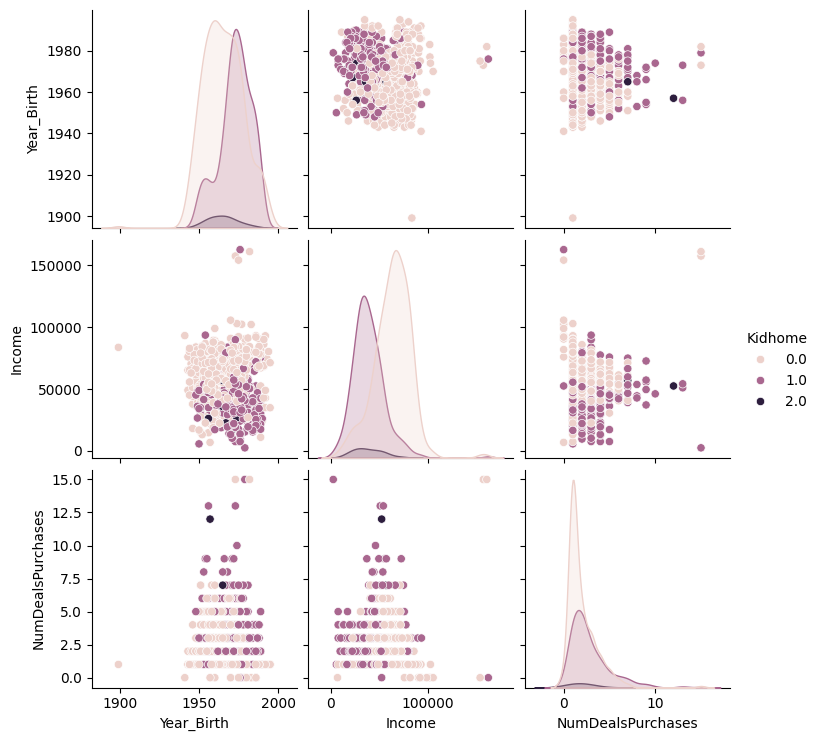

In [21]:
import seaborn as sns
sns.pairplot(df[['Year_Birth', 'Income', 'Kidhome', 'NumDealsPurchases']], hue='Kidhome')


Исходя из графика можно увидеть, клиенты старшего возраста имеют более высокий доход, наибольший доход имеют клиенты, у которых нет детей. Наибольшее количество покупок совершают клиенты, которые не имеют детей. Больше всего покупок совершают клиенты, которые имеют доход от 50000 до 100000.

 Построена точечная диаграмма (матрица диаграмм рассеяния) для числовых признаков: доход, количество детей и количество покупок. Раскрашена по параметру образование.

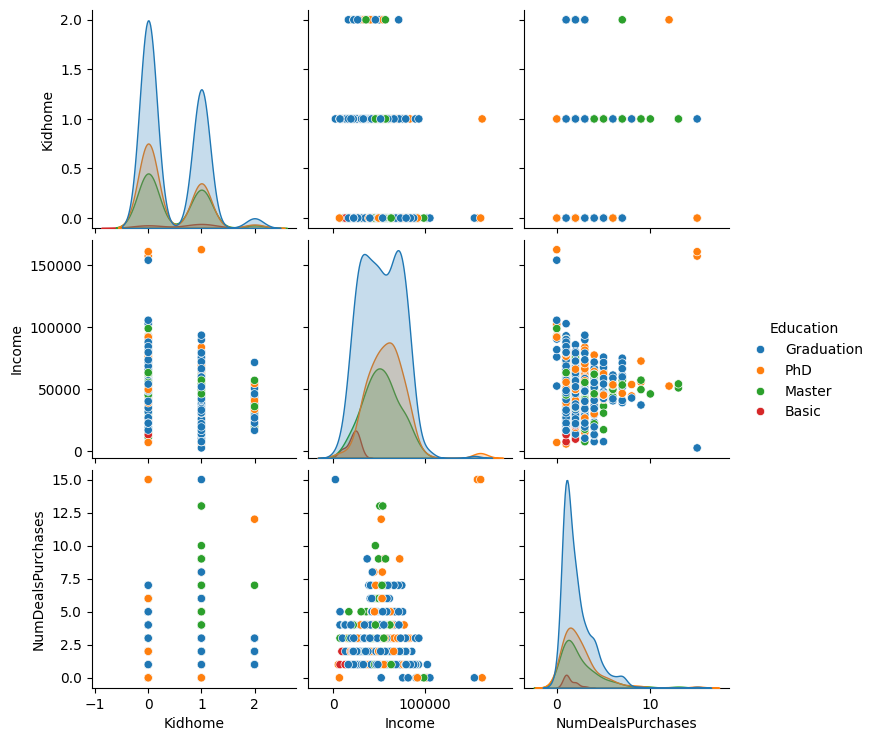

In [22]:
import seaborn as sns
sns.pairplot(df[['Kidhome', 'Income', 'Education', 'NumDealsPurchases']], hue='Education')

По полученным данным можно заметить, что самый маленький доход имеют клиенты с базовым образованием, самый большой - с высшим. Клиенты с высшим образованием чаще делают покупки.

### 6. Построение гистограмм

Построение гистограмм с помощью библиотеки seaborn и метода hist. Параметр bins определяет количество областей, на которые следует разделить диапазон данных. Были созданны гистограммы для каждого числового признака.

Гистограмма по году рождения.

<Axes: xlabel='Year_Birth', ylabel='Count'>

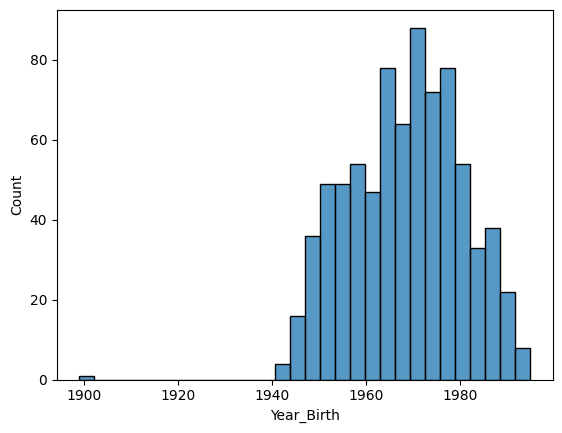

In [23]:
sns.histplot(df['Year_Birth'], bins = 30)

Из диаграммы можно понять, что самое большое количсество клиентов радились в 1960-1980 годах.

Гистограмма по доходу.

<Axes: xlabel='Income', ylabel='Count'>

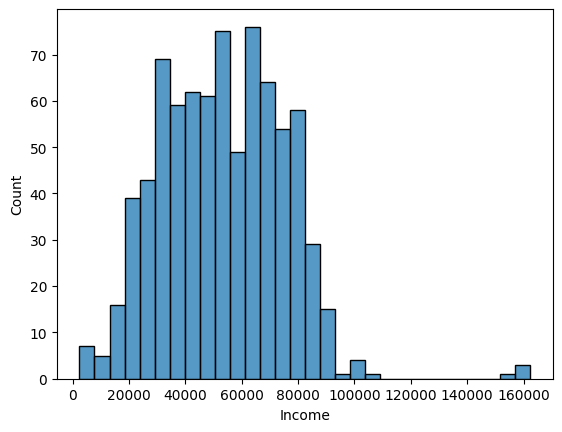

In [24]:
sns.histplot(df['Income'], bins = 30)

Доход клиентов большинства клиентов составляет 30000-70000 денежных единиц.

Гистограмма по количеству детей

<Axes: xlabel='Kidhome', ylabel='Count'>

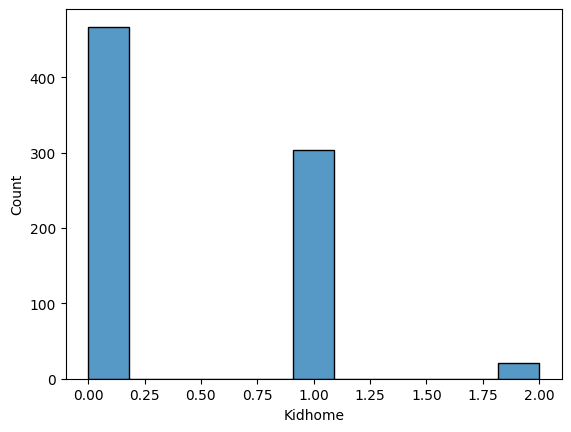

In [25]:
sns.histplot(df['Kidhome'])

У большинства клиентов нет детей.

Гисторгамма по количеству покупок.

<Axes: xlabel='NumDealsPurchases', ylabel='Count'>

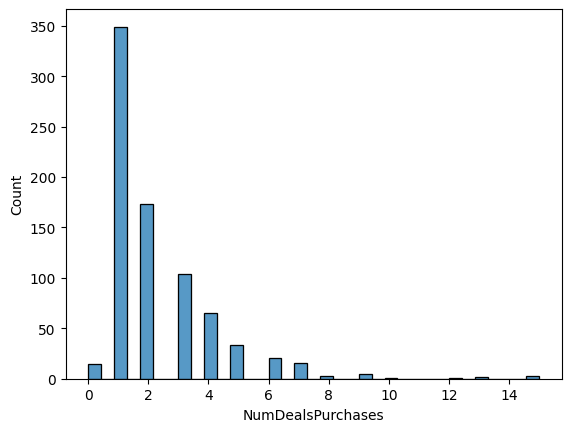

In [26]:
sns.histplot(df['NumDealsPurchases'])

Основная масса клиентов совершает одну покупку за период времени.

### 7. Коэффициент корреляции и ковариации

Коэффициент Пирсона найден с помощью метода corr(). Этот метод cчитает матрицу корреляций между всеми числовыми столбцами датафрейма. Параметр numeric_only=True - в подсчёте учитываются только числовые колонкии.

In [27]:
df.corr(numeric_only = True)

,ID,Year_Birth,Income,Kidhome,NumDealsPurchases
ID,1.000000,0.027313,0.051317,0.006823,-0.030554
Year_Birth,0.027313,1.000000,-0.142816,0.245696,-0.060750
Income,0.051317,-0.142816,1.000000,-0.528401,-0.053570
Kidhome,0.006823,0.245696,-0.528401,1.000000,0.198437
NumDealsPurchases,-0.030554,-0.060750,-0.053570,0.198437,1.000000


Существенные корреляции:

Доход и Количество детей
Коэффициент: -0.528 - умеренная отрицательная корреляция. Чем выше доход, тем меньше детей дома.

Год рождения и Количество детей
Коэффициент: 0.246 - слабая положительная корреляция. Более молодые люди реже имеют детей дома


Коффициент Пирсона для даты рождения и всех остальных числовых столбцов.

In [28]:
df.corrwith(df['Year_Birth'], numeric_only = True)


ID                   0.027313
Year_Birth           1.000000
Income              -0.142816
Kidhome              0.245696
NumDealsPurchases   -0.060750
dtype: float64

Коффициент Пирсона для количества детей и количества покупок.

In [29]:
df['NumDealsPurchases'].corr(df['Kidhome'])

np.float64(0.19843707834659619)

Составлена тепловая карта корреляции.

В тепловой карте визуализация значений данных реализуется с помощью разных цветов. Для создания тепловой карты использовался метод heatmap с параметрами: annot (отображение числовых значений коэффициентов), cmap (задает цветовую карту) , linewidth (устанавливает толщину линий, разделяющих ячейки).

Text(0.5, 1.0, 'Тепловая карта корреляции')

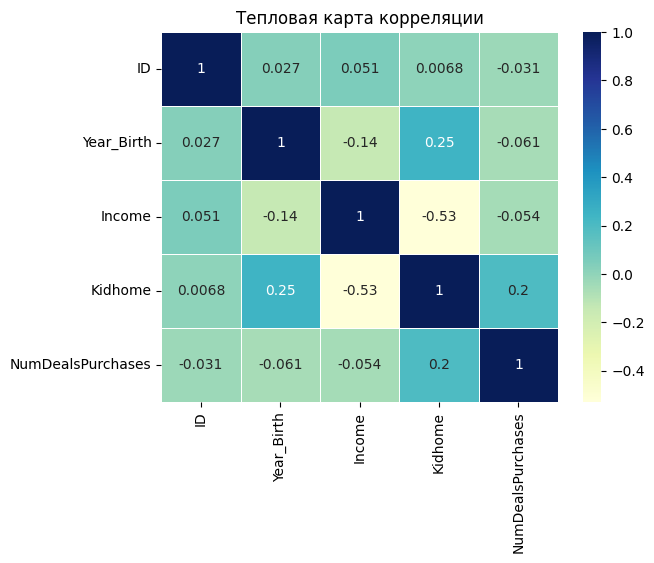

In [30]:
df_corr=df.corr(numeric_only = True)
sns.heatmap(df_corr,annot=True, cmap='YlGnBu', linewidths=.5).set_title('Тепловая карта корреляции')

### 8. Задания по варианту

#### Задание 1

Использовала seaborn. По группировке - количество клиентов по
количеству детей и по каждому семейному статусу:

Сначала выполнялась группировка: количество клиентов по количеству детей и по семейному статусу. И сортировка: по семейному положению по возрастанию.

In [31]:
df_group=df.groupby(['Kidhome','Marital_Status' ])['ID'].count().reset_index(name='count')
df_group=df_group.sort_values(by='Marital_Status', ascending=True)


Далее создается столбчатая диаграмма c помощью метода barplot, где горизонталь - семейное положение, вертикаль - количество клиентов, а параметр hue задает раскраску столбцов по количеству детей. Метод set_title используется для задания название диаграмме, методы set_ label устанавливают подписи для осей. Метод legend добавляет легенду, title - заголовок легенды, loc определяет местоположение легенды.

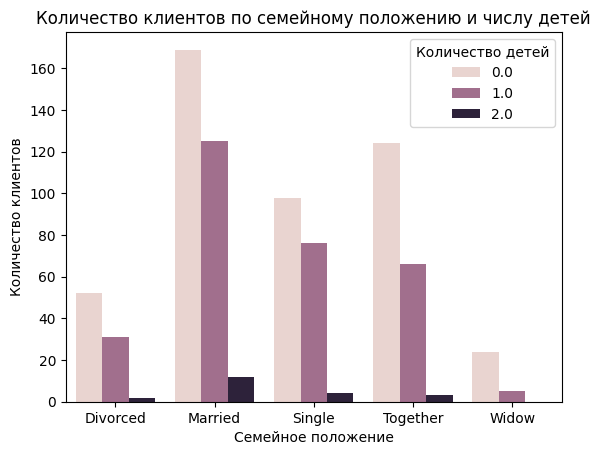

In [32]:
bp = sns.barplot(data=df_group, x='Marital_Status', y='count', hue='Kidhome')
bp.set_title('Количество клиентов по семейному положению и числу детей')
bp.set_xlabel('Семейное положение')
bp.set_ylabel('Количество клиентов')
bp.legend(title='Количество детей', loc='upper right')

Преобладают семейные клиенты. Вдовы - самая малочисленная категория



#### Задание 2 



Создана сводная таблица, где данные сгруппированы по уровню образования клиентов и вычислен минимальный доход для каждой группы. Метод plot создает график на основе таблицы. Параметр style указывает, какой символ будет использован для обозначений, с помощью параметров color и markersize настраивается цвет и размер символов. grid - показать сетку. Xlabel и ylabel задают названия осям, title устанавливает заголовок графика.

<Axes: title={'center': 'График среднего дохода по образованию'}, xlabel='Образование', ylabel='Минимальный доход'>

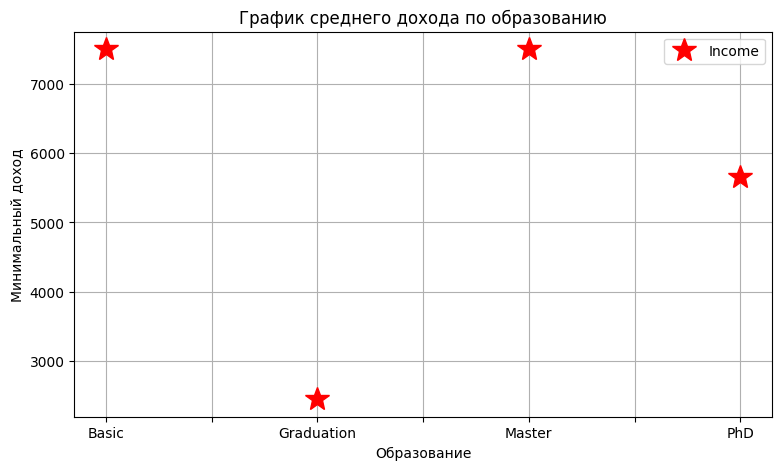

In [33]:
pivot_table = df.pivot_table(index='Education', values='Income', aggfunc='min')
pivot_table.plot(style='*', markersize = 18, color = 'red', grid=True, ylabel = 'Минимальный доход',
                 xlabel = 'Образование',figsize = (9, 5),
                 title = 'График среднего дохода по образованию')

Клиенты с образованием Master и Basic имеют самый высокий минимальный доход, клиенты с образованием Graduation имеют самый низкий минимальный доход


#### Задание 3 

Использовать matplotlib. Отфильтровать клиентов по year_birth
больше 1980. Построить круговую диаграмму, которая отображает процент
клиентов каждого семейного положения.

С помощью фильтра оставляем только клиентов, родившиеся после 1980 года. Затем с помощью метода value_counts() подсчитывается количество клиентов в каждой категории семейного положения.

In [34]:
f_df = df[df['Year_Birth'] > 1980]
ms_counts = f_df['Marital_Status'].value_counts()
ms_counts

Marital_Status
Married     50
Single      46
Together    27
Divorced     3
Name: count, dtype: int64

Диаграмма создается с помощью библиотеки Matplotlib. Устанавливается размер графика, и с помощью pie() на основе данных из ms_counts создается круговая диаграмма. Параметр labels использует индексы ms_counts в качестве названий сегментов, параметр autopct указывает как отображать проценты на сегментах, startangle устанавливает начальный угол для первого сегмента. legend() добавляет легенду, параметр loc определяет местоположение легенды, параметр prop() - размер шрифта для легенды.

Text(0.5, 1.0, 'Распределение клиентов по семейному положению')

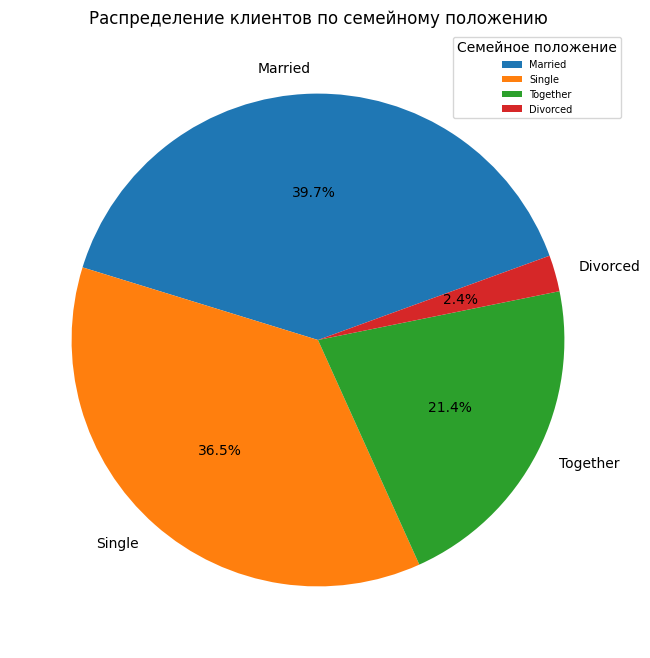

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
fig = plt.pie(ms_counts, labels=ms_counts.index, autopct='%1.1f%%', startangle=20)
plt.legend( loc='upper right', title ='Семейное положение', prop={'size': 7})
plt.title('Распределение клиентов по семейному положению')

Из графика видно, что наибольшая часть клиентов имеют партнеров. Доля вдов настолько незначительна, что не повлияла на диаграмму.

### 9. График hexagonal binning plot.

Hexagonal binning plot - специальный тип диаграммы, который группирует значения в шестиугольники для визуализации плотности распределения. Ось X - доход, ось Y - дата рождения. Параметр gridsize - определяет детализацию разбиения на шестиугольники, figsize - устанавливает размер графика, grid - не показывать сетку.

<Axes: xlabel='Income', ylabel='Year_Birth'>

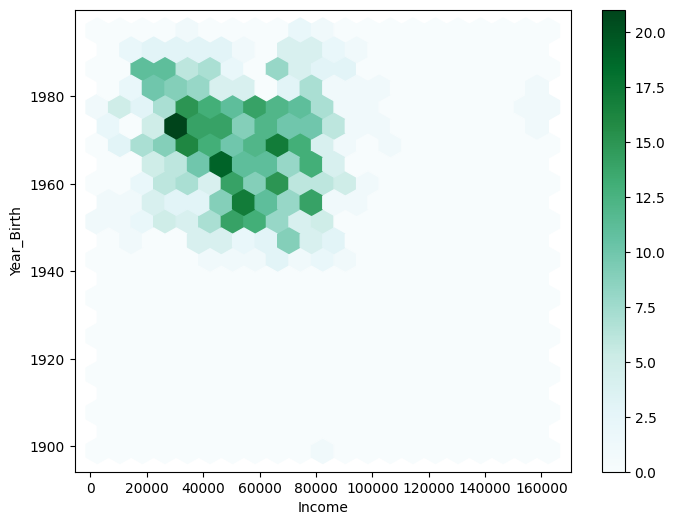

In [42]:
df.plot(x='Income', y='Year_Birth', kind='hexbin', gridsize=20, figsize=(8, 6), grid=False)

Больше всего клиентов с доходом около 30000 и возрастом 50-60 лет. Чем больше год рождения, тем меньше клиентов и меньше их доход.

### 10. Графики boxplot.


Было сделано построение графика boxplot, показывающего распределение по доходу. График составлен с помощью pandas.

<Axes: >

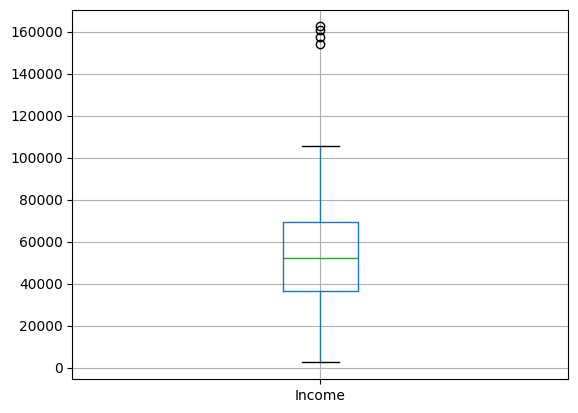

In [37]:
df.boxplot(column = 'Income')

На графике видно, что основная масса данных сосредоточена в нижнем диапазоне, при этом присутствуют значительные выбросы в области высоких доходов. Медианное значение дохода находится ближе к нижней границе распределения. Большое количество выбросов выше верхнего уса показывает наличие редких клиентов с высокими доходами. Средний доход примерно 56000.

Созданы три категории дохода - low (0-45000), mid (45000-65000), hight (65000 и более). График составлен с помощью библиотеки seaborn

<Axes: xlabel='Category', ylabel='Income'>

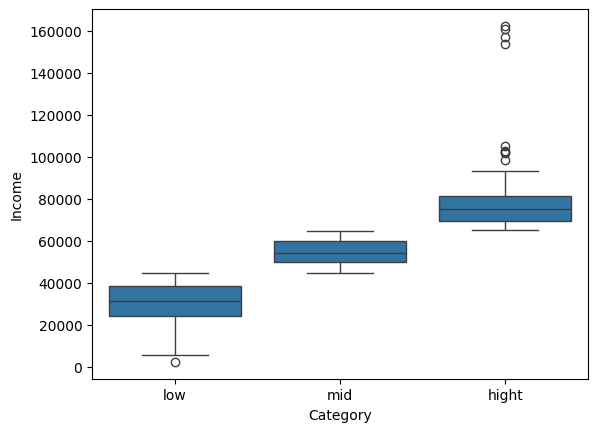

In [38]:
bins = [0, 45000, 65000, float('inf')]
labels = ['low', 'mid', 'hight']
df['Category'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)
sns.boxplot(data=df, y="Income", x="Category")

Узкий разброс средней и высокой категориях. У низкого дохода разброс чуть больше. В категории высокого дохода присутсвует значительное количество выбросов. В низкой категории - один выброс, который находится около нуля. Возможно, ошибка в данных.

Построен график по доходу и семейному положению. Параметр by=" " создает отдельный ящик с усами для каждой категории. График состален с помощью библиотеки pandas.

<Axes: title={'center': 'Income'}, xlabel='Marital_Status'>

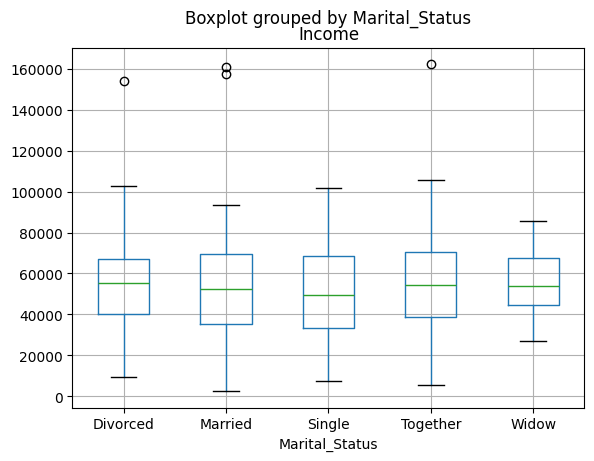

In [39]:
df.boxplot(column='Income', by='Marital_Status')

Разведенные имеют самый высокий медианный доход среди всех групп. Не в браке, но в отношениях показывают наибольший разброс доходов и высокий медианный уровень. У одиноких медианных доход самый низкий.

Построен еще один boxplot по количеству покупок с помощью библиотеки matplotlib. Параметр vert=False делает диаграмму горизонтальной 

{'whiskers': [<matplotlib.lines.Line2D at 0x2e801a19580>,
 'caps': [<matplotlib.lines.Line2D at 0x2e801a19bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e801a18ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x2e801a1a1b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e801a1a240>],
 'means': []}

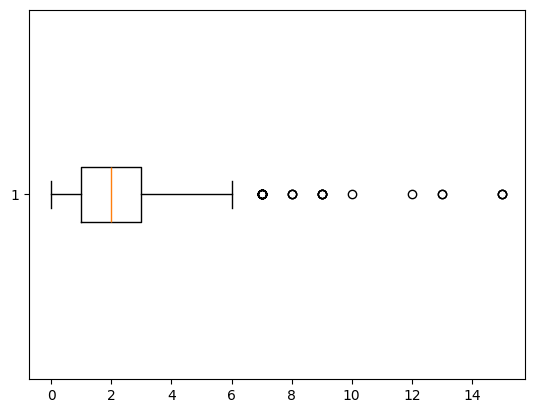

In [44]:
import matplotlib.pyplot as plt
plt.boxplot(df['NumDealsPurchases'], vert = False)

Видно, что в среднем клиенты совершают две покупки. Также присутствует большое количество выбросов вверх.

### Выводы

В ходе выполнения лабораторной работы был проведен комплексный исследовательский анализ данных о клиентах магазина из датасета clients2.csv. 

Были закреплены навыки предобработки данных: устранены пропуски в данных, исправлены неявные дубликаты в категориальных переменных, изменены форматы данных.

Приобретены навыки по составлению диаграмм различных видов: матрицы, столбчатые, круговые, boxplot и прочие. Проведен корреляционный анализ и анализ распределений.

Также изучена библиотека seaborn.

Проведенный анализ предоставляет ценную информацию для принятия управленческих решений в области клиентского маркетинга и разработки персонализированных предложений для различных сегментов потребителей.
